# IMDB movie analysis data set 
# Data sourcing : KAGGLE
# Importing libraries numpy, pandas , matplotlib and seaborn

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [57]:
imdb = pd.read_csv("IMDB_Movies_Dataset.csv")\
#reading the csv file with pandas

In [58]:
# pandas provides some methods and attributes to understand the data set .
# these are the best methods and attributes to understand the data set for the further steps in EDA.
#imdb.head()       # First 5 rows
#imdb.tail()       # Last 5 rows
#imdb.sample(5)    # Random 5 rows
#imdb.info()       # Summary of the dataframe
#imdb.describe()   # Stats summary for numeric columns
imdb.shape        # (rows, columns)
#imdb.columns      # Column names
#imdb.index        # Index range
#imdb.dtypes       # Data types of columns
#imdb.values       # Numpy array of values
#imdb.size         # Total number of elements
#imdb.ndim         # Number of dimensions (usually 2)


(4989, 13)

In [59]:
imdb.head()

,Unnamed: 0,Title,Average Rating,Director,Writer,Metascore,Cast,Release Date,Country of Origin,Languages,Budget,Worldwide Gross,Runtime
0,0,The Shawshank Redemption,9.3,Frank Darabont,"Stephen King, Frank Darabont",82.0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","October 14, 1994 (India)",United States,English,"$25,000,000 (estimated)","$29,332,133",2 hours 22 minutes
1,1,Attack on Titan the Movie: The Last Attack,9.3,Yûichirô Hayashi,"Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue",NaN,"Natsuki Hanae, Yoshimasa Hosoya, Marina Inoue,...","November 8, 2024 (Japan)",Japan,Japanese,NaN,"$3,513,659",2 hours 25 minutes
2,2,The Godfather,9.2,Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola",100.0,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",1978 (India),United States,"English, Italian, Latin","$6,000,000 (estimated)","$250,342,198",2 hours 55 minutes
3,3,Hababam Sinifi,9.2,Ertem Egilmez,"Umur Bugay, Rifat Ilgaz",NaN,"Münir Özkul, Tarik Akan, Halit Akçatepe, Kemal...","April 1, 1975 (Turkey)",Turkey,Turkish,NaN,NaN,1 hour 25 minutes
4,4,Ramayana: The Legend of Prince Rama,9.2,"Ram Mohan, Yûgô Sakô, Koichi Saski","Rani Burra, Ram Mohan, Yûgô Sakô",NaN,"Arun Govil, Nikhil Kapoor, Edie Mirman, Rael P...","September 25, 2001 (India)","India, Japan",English,NaN,NaN,2 hours 15 minutes


# data cleaning 
#### In Exploratory Data Analysis (EDA), data cleaning refers to the process of detecting, correcting, or removing errors, inconsistencies, and missing values in a dataset to ensure it is suitable for analysis. It is a crucial early step in EDA because:

In [60]:
imdb.isnull().sum() #checking how many null values are there in each column 

Unnamed: 0              0
Title                   0
Average Rating          0
Director                0
Writer                  1
Metascore            1934
Cast                    7
Release Date            0
Country of Origin       3
Languages              21
Budget               2338
Worldwide Gross      1094
Runtime                 0
dtype: int64

In [61]:
imdb.columns

Index(['Unnamed: 0', 'Title', 'Average Rating', 'Director', 'Writer',
       'Metascore', 'Cast', 'Release Date', 'Country of Origin', 'Languages',
       'Budget', 'Worldwide Gross', 'Runtime'],
      dtype='object')

In [62]:
imdb.drop(columns=['Unnamed: 0'], inplace=True)

In [63]:
imdb.shape

(4989, 12)

In [64]:
#lets calculate the percentage of missing values in each column , depending on that we can if we have to fill or drop the missing values

float(100.0*1934/4989) #percentage of missing values in metascore
float(100.0*1/4989)    #percentage of missing values in writer
float(100.0*7/4989)    #percentage of missing values in cast
float(100.0*3/4989)    #percentage of missing values in country of origin
float(100.0*21/4989)    #percentage of missing values in languages
float(100.0*2338/4989)    #percentage of missing values in budget
float(100.0*1094/4989)    #percentage of missing values in worldwide grosser





21.92824213269192

##### DROPPING THE MISSING VALUES WHERE THE PERCENTAGE OF NULL VALUES IN BELOW 30 percentage.


In [74]:
imdb.dropna(subset=['Writer', 'Cast','Country of Origin','Languages'], inplace=True)
imdb.dropna(subset=['Budget', 'Worldwide Gross'], inplace=True)


In [75]:
imdb.isnull().sum()

Title                0
Average Rating       0
Director             0
Writer               0
Metascore            0
Cast                 0
Release Date         0
Country of Origin    0
Languages            0
Budget               0
Worldwide Gross      0
Runtime              0
dtype: int64

In [70]:
# converting the  'Budget' and 'Worldwide Gross' to numeric
def clean_money(value):
    if pd.isna(value):
        return np.nan
    return pd.to_numeric(value.replace('$', '')
                               .replace(',', '')
                               .replace('(estimated)', '')
                               .strip(), errors='coerce')

imdb['Budget'] = imdb['Budget'].apply(clean_money)
imdb['Worldwide Gross'] = imdb['Worldwide Gross'].apply(clean_money)


In [72]:
#Filling the missing Metascore with mean
imdb['Metascore'].fillna(imdb['Metascore'].mean(), inplace=True)


In [76]:
imdb.isnull().sum()

Title                0
Average Rating       0
Director             0
Writer               0
Metascore            0
Cast                 0
Release Date         0
Country of Origin    0
Languages            0
Budget               0
Worldwide Gross      0
Runtime              0
dtype: int64

### OUTLIER HANDLING

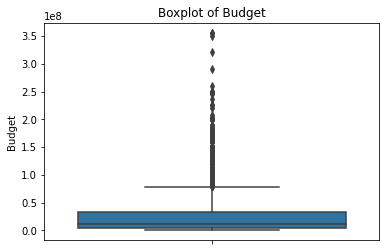

In [78]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=imdb['Budget'])
plt.title('Boxplot of Budget')
plt.show()


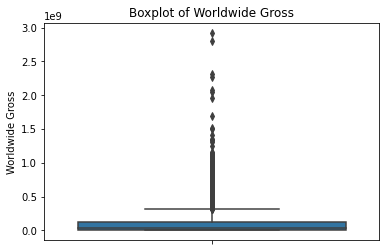

In [79]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=imdb['Worldwide Gross'])
plt.title('Boxplot of Worldwide Gross')
plt.show()


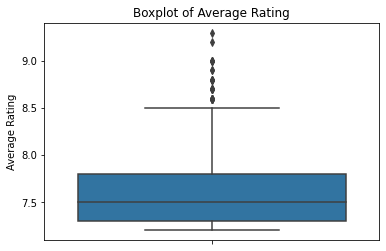

In [82]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=imdb['Average Rating'])
plt.title('Boxplot of Average Rating')
plt.show()


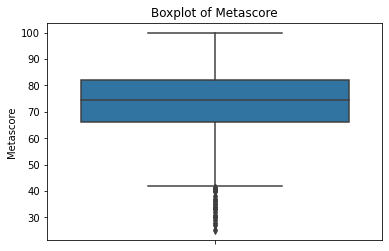

In [85]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=imdb['Metascore'])
plt.title('Boxplot of Metascore')
plt.show()


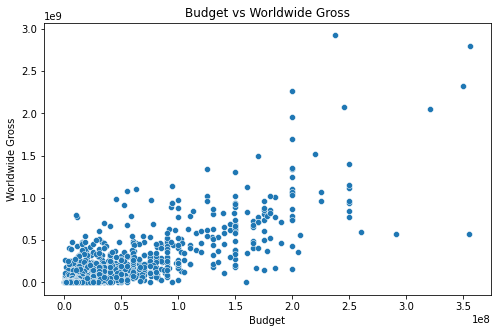

In [86]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Budget', y='Worldwide Gross', data=imdb)
plt.title('Budget vs Worldwide Gross')
plt.show()


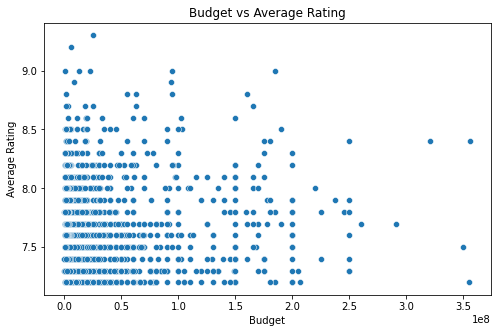

In [87]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Budget', y='Average Rating', data=imdb)
plt.title('Budget vs Average Rating')
plt.show()


In [88]:
imdb['Runtime'].describe()


count                  1806
unique                  142
top       1 hour 42 minutes
freq                     40
Name: Runtime, dtype: object

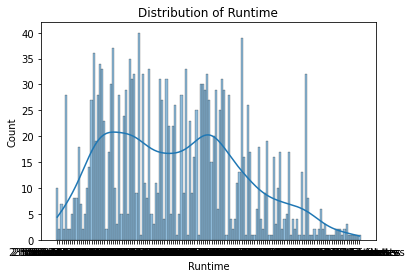

In [102]:
#Use histograms and KDE plots to see how your numerical features are distributed.
sns.histplot(imdb['Runtime'], kde=True)
plt.title("Distribution of Runtime")
plt.show()


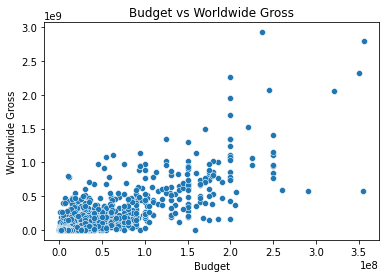

In [103]:
#Check Correlation Between Numeric Variables
sns.scatterplot(x='Budget', y='Worldwide Gross', data=imdb)
plt.title("Budget vs Worldwide Gross")
plt.show()



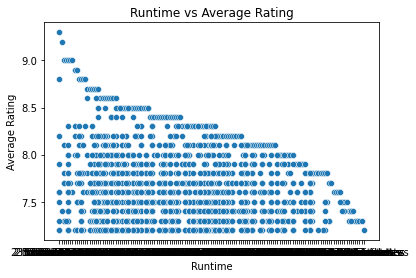

In [97]:
sns.scatterplot(x='Runtime', y='Average Rating', data=imdb)
plt.title("Runtime vs Average Rating")
plt.show()


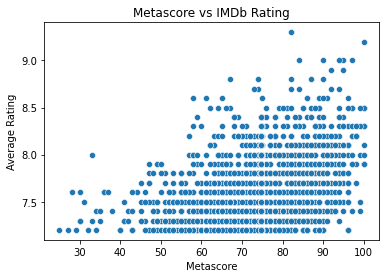

In [98]:

sns.scatterplot(x='Metascore', y='Average Rating', data=imdb)
plt.title("Metascore vs IMDb Rating")
plt.show()

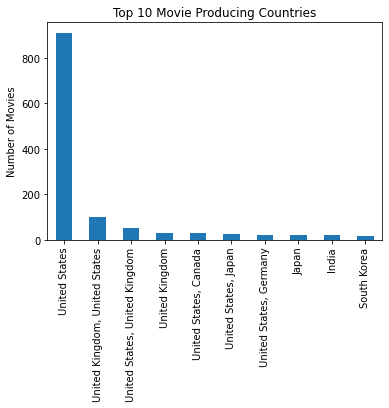

In [100]:
imdb['Country of Origin'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Movie Producing Countries")
plt.ylabel("Number of Movies")
plt.show()


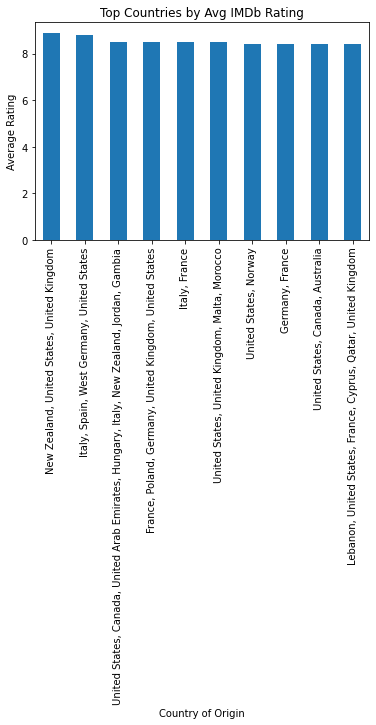

In [101]:
imdb.groupby('Country of Origin')['Average Rating'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top Countries by Avg IMDb Rating")
plt.ylabel("Average Rating")
plt.show()
